In [2]:
using RandomMatrices 
using Random 
using Distributions 
using LinearAlgebra
using Plots
using StatsBase
using QuadGK

using Polynomials
using SpecialPolynomials

# Exercise 1

Generate $10^3$ matrices of various sizes (2x2, 4x4, etc)
for GOE. Plot the difference of the adjacent eigenvalues (staying far from
the edges of the whole spectrum), and compare the results to the Wigner
surmise.

In [3]:
X = rand(Normal(0, 1), 2, 2)

B = 0.5 * (X + X') 

2×2 Matrix{Float64}:
 0.536885   0.114311
 0.114311  -0.451721

same as:

In [4]:
A = rand(Wigner(1), 2)

2×2 Symmetric{Float64, Matrix{Float64}}:
 0.0243102  0.076297
 0.076297   1.00476

2x2 GOE:

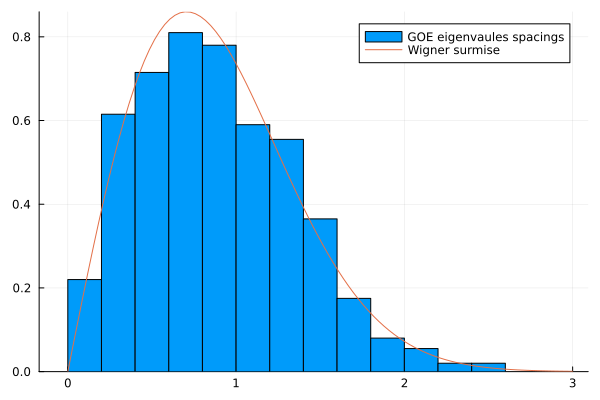

In [37]:
matrices = [rand(Wigner(1), 2) for _ in 1:1000]
eigvalues = [eigvals(matrix) for matrix in matrices]
eigval_diff = [abs(pair[1] - pair[2]) for pair in eigvalues]

D = mean(eigval_diff)

s = LinRange(0, 3, 100)

function surmise(s, D)
    pi / 2 * (s / D) * exp(- pi * (s / D)^2 / 4) 
end

norm_, error = quadgk(x->surmise(x, D), 0, Inf) # additional normalization of the wigner surmise distribution

histogram(eigval_diff, normed=true, bins=20, label="GOE eigenvaules spacings")
plot!(s, 1/norm_ .* surmise.(s, D), label="Wigner surmise")

for 4x4 GOE:

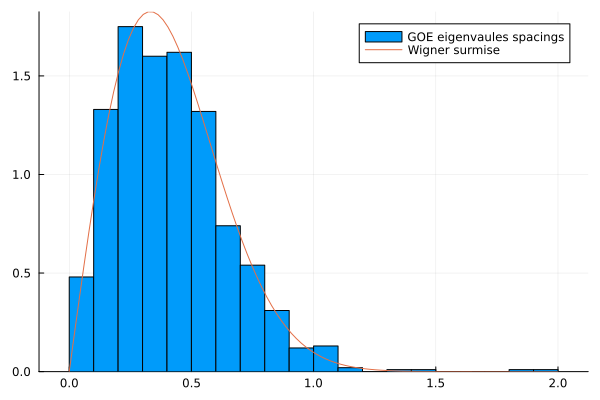

In [38]:
matrices = [rand(Wigner(1), 4) for _ in 1:1000]
eigvalues = [eigvals(matrix) for matrix in matrices]
eigval_diff = [abs(pair[2] - pair[3]) for pair in eigvalues]


D = mean(eigval_diff)   

s = LinRange(0, 2, 100)

function surmise(s, D)
    pi / 2 * (s / D) * exp(- pi * (s / D)^2 / 4) 
end

norm_, error = quadgk(x->surmise(x, D), 0, Inf) # additional normalization of the wigner surmise distribution

h = histogram(eigval_diff, normalized=:pdf, label="GOE eigenvaules spacings")
plot!(s, 1/norm_ .*surmise.(s, D), label="Wigner surmise", nbins=50)

# Exercise 2

Calculate first 10 moments $M_k$ from your numerics, and compare your results with analytics, i.e. expand $G(z)$ at $z=\infty$ up to 10th term. Then check if the obtained sequence of integers 1, 2, .... appear in Sloane’s Online
Encyclopedia of Integer Sequences (www.oeis.org).

Generating function of spectral moments is a Green's function:

$$ G(z) = \frac{1}{N} \left< \mathrm{Tr} \frac{1}{z \bf{1}_{N} - X}\right> = \frac{1}{N} \sum_{k=0}^{\infty} \frac{\left< \mathrm{Tr} X^k\right>}{z^{k+1}} = \int \rho(\lambda) \frac{d\lambda} {z - \lambda}$$


Expanding both formulas around $z = \infty$ we get Spectral moments

$$ M_{k} = \frac{1}{N} \left<\mathrm{Tr} X^{k} \right>  = \int \rho(\lambda) \lambda^k d\lambda$$




In [6]:
N = 100

matrices = [rand(Wigner(2), N) for _ in 1:1000]

M = k-> mean([tr(X^k) for X in matrices]) / N

[M(k-1) for k in 1:13]


13-element Vector{Float64}:
   1.0
  -0.00031790548909643105
   0.9998338772915893
  -0.0006004621503914494
   1.9999537471542197
  -0.0015267222023096893
   5.003219861868299
  -0.003991676055306512
  14.024270714819075
  -0.008050918851174585
  42.13571408813424
  -0.00011970826772592034
 132.68159220254816

For GUE spectral density is given by Wigner semicircle law: 

$$ \rho(\lambda) = \frac{1}{2 \pi }\sqrt{4  - \lambda^2}.$$

So we can calculate moments analytically

$$ M_{k}  =  \frac{1}{2 \pi } \int_{-2}^{2} \sqrt{4  - \lambda^2} \lambda^k d\lambda$$


In [7]:
[quadgk(λ->  sqrt(4 - λ^2) * λ^(k-1) /(2*pi), -2, 2)[1] for k in 1:13]

13-element Vector{Float64}:
   1.0000000007395782
  -2.3097771010384415e-15
   1.0000000007078564
  -2.7283367925426528e-15
   2.000000001479159
   2.9016033135252197e-15
   5.0000000040042405
   4.954716048590478e-15
  14.000000008367387
   1.7107448586541655e-14
  42.00000003346954
  -8.322471129955052e-14
 132.0000000906057

in both cases we got sequences:

1, 1, 2, 5, 14, 42, 132,...

https://oeis.org/search?q=1+0+1+0+2+0+5+0+14+0+42&language=english&go=Search

# Exercise 3

Using the explicit representations for the weight and for orthogonal polynomials, plot the average spectral function $\rho(\lambda)$  for $N = 1, 2, 5, 10$ and $20$. Observe how the subsequent curves approximate better and better the Wigner’s semicircle.




## Wigner Semicircle 

$$ \rho(\lambda) = \frac{1}{2 \pi \sigma^2}\sqrt{4 \sigma^2 - \lambda^2}$$

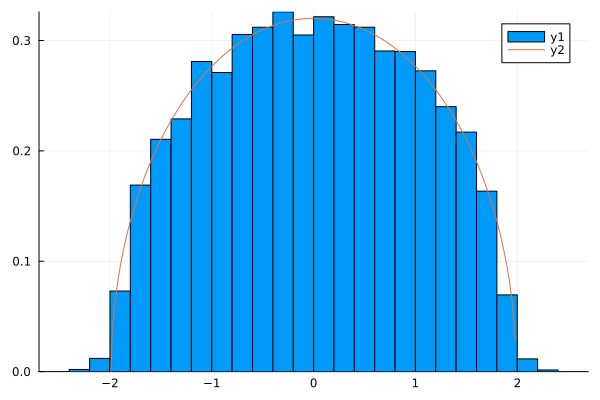

In [52]:
Hs = [rand(Wigner(2), 10) for i in 1:1000]
spectra = collect(Iterators.flatten(eigvals.(Hs)))

function semicircle(σ, λ)
    1 / (2 * pi * σ^2) * sqrt(4 * σ^2 - λ^2)
end

σ = var(spectra)
λ = -2*σ:0.01:2*σ

semicircle_norm, error = quadgk(x->semicircle(σ, x), -2*σ, 2*σ)

histogram(spectra, bins=40, normed=true)
plot!(λ, 1 / semicircle_norm .* semicircle.(σ, λ))


Formulae from the notes:

$$\rho(\lambda) = K_{N}(\lambda, \lambda) = e^{-N V(\lambda)} \sum_{j=0}^{N-1} \left[ P_{j}(\lambda)\right]^2$$

$$ P_{k}^{(N)}(\lambda) = \left( \frac{N}{2 \sigma^2}\right)^{1/4} h_{k}\left[ \sqrt{\frac{N}{2 \sigma^2}} \lambda\right], \quad V(\lambda) = \frac{\lambda^2}{2 \sigma^2},$$

where $h_{k}$ - Hermite polynomials.

$$ \rho^{(N)}(\lambda) =  \sqrt{ \frac{N}{2 \sigma^2}} e^{\frac{-N \lambda^2} {2 \sigma^2}}  \sum_{j=0}^{N-1}   \left(h_{j}\left[ \sqrt{\frac{N}{2 \sigma^2}} \lambda\right] \right)^2$$



In the notes orthogonality relation for Hermite polynomials is given by:

$$ \int_{-\infty}^{\infty} h_k(x) h_{l}(x) e^{-x^2} = \delta_{kl}$$

But usual convention is a bit different (most mathematical libraries use it): 

$$ \int_{-\infty}^{\infty} H_k(x) H_{l}(x) e^{-x^2} = \sqrt{\pi} 2^k k!\delta_{kl}$$

So if we want our spectral density to not explode, our polynomials should be properly normalized. We need to redifine them to absorb $\sqrt{\pi} 2^k k!$. 

Additionallly we need to devide our spectral distribution by normalization $N$, so it will be number of polynomials independent.

This yields ($\sigma = 1$):

$$ P_{k}^{(N)}(\lambda) = \sqrt{\frac{1}{2^k k!}} \left( \frac{N}{ 2 \pi }\right)^{1/4} h_{k}\left[ \sqrt{\frac{N}{2}} \lambda\right], \quad V(\lambda) = \lambda^2 / 2 \sigma^2,$$

$$ \rho^{(N)}(\lambda) =  \frac{1}{N}\sqrt{ \frac{N}{2 \pi \sigma^2}} e^{-N \lambda^2 / 2 \sigma^2}  \sum_{j=0}^{N-1}  \frac{1}{2^j j!} \left(h_{j}\left[ \sqrt{ \frac{N}{2 \sigma^2}} \lambda\right] \right)^2$$

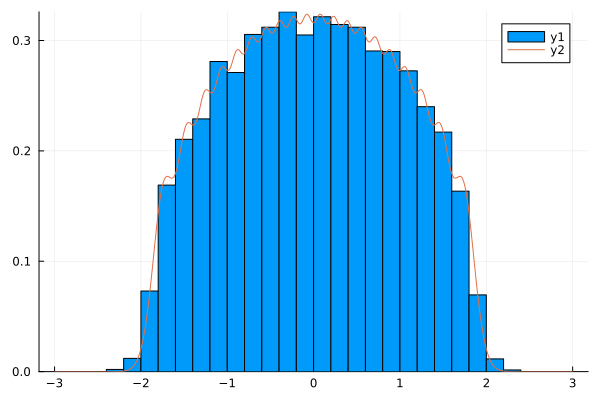

In [53]:
function GUE_spectral_distribution_mod(λ, N, σ)
    x = variable(Polynomial{Rational{Int}})
    hermite_polynomials = [basis(Hermite, i-1)(x) for i in 1:N] # 0,1, ... N-1
    squared_hp = [polynomial * polynomial / (2^(j-1) * factorial(big(j-1))) for (j, polynomial) in enumerate(hermite_polynomials)]
    sum_squared_hp = sum(squared_hp)

    return  exp(-N * λ^2 / 2 / σ^2) * sum_squared_hp(sqrt(N / (2 * σ^2)) * λ) * sqrt(N / (2 * pi * σ^2)) / N
end

λ = LinRange(-3, 3, 1000)
σ = var(spectra)


histogram(spectra, bins=40, normed=true)
plot!(λ, GUE_spectral_distribution_mod.(λ, 20, σ))


# Exercise 4

Plot eigenvalues of matrix $\frac{1}{T} X X^{\dagger}$, where $X$ - gaussian $N \times T$ matrix. Compare it with Marchenko-Pastur distribution.

Marchenko-Pastur distribution:

$$ \rho(\lambda) = \frac{1}{2 \pi c \lambda \sigma^2} \sqrt{(r_{+} - \lambda)(\lambda - r_{-})}$$

$$ c = \mathrm{lim}_{N,T \rightarrow \infty} \frac{N}{T}, \quad r_{\pm} = \sigma (1 \pm \sqrt{c})^2$$

Variance of elements of the Wishart matrix:

* Variance of product of two gaussians with zero mean is a product of variances.
* Variance of the sum of gaussians with zero mean is a sum of their variances

Using this two facts we can conclude that variance of the elements of $XX^{\dagger}$ is

$$ \mathrm{var}(XX^{\dagger}) =  N$$

where factor $2$ comes from the fact that we use complex numbers.

So in order two have Wishart $X X^{\dagger} / T$ with elements from $\mathcal{N}(0, 1)$ we need to populate our random matrices $X_{re}$

and $X_{im}$ ($X= (X_{re} + i X_{im}) / \sqrt{2}$) with elements from $\mathcal{N}(0, \sqrt{\frac{T}{N}})$.

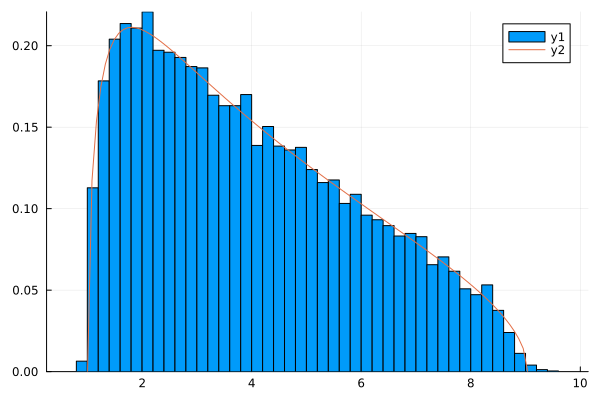

In [88]:
function spectral_distribution(N, T)
    spectrum = []

    for i in 1:500
        X_re = rand(Normal(0, sqrt(T/N)), N, T)
        X_im =  rand(Normal(0, sqrt(T/N)), N, T)
        X = (X_re + im * X_im) / sqrt(2)

        M = X * X' / T

        for eigv in eigvals(M)
            push!(spectrum, eigv)
        end
    end

    return spectrum
end

N = 25
T = 100

spectrum = spectral_distribution(N, T)

c = N / T

σ = var(spectrum)

r_minus = σ * (1 - sqrt(c))^2
r_plus = σ * (1 + sqrt(c))^2

function marchenko_pastur(λ, σ, r_minus, r_plus, c)
    sqrt((r_plus - λ) * (λ - r_minus)) / (2 * pi * c * λ * σ^2)
end

mp_norm, error = quadgk(x->marchenko_pastur(x, σ, r_minus, r_plus, c), r_minus, r_plus)

histogram(spectrum, bins=50, normed=true)

x = LinRange(r_minus, r_plus, 100)
plot!(x, 1 / mp_norm .* marchenko_pastur.(x, σ, r_minus, r_plus, c))

In [89]:
σ

4.017303226960052

# Exercise 5

Generate several sums $M = H_1 + U H_2 U^{\dagger}$ , where $H_1,H_2$ are
diagonal matrices with randomly distributed equal number of values
$\pm 1/2$, and $U$ is a Haar measure. Then, diagonalize an ensemble of
$M $’s, and plot the resulting spectral distribution, and compare it to
analytic result, known as a free arcsine distribution.



Free arcsine distribution:

$$ \rho_{H_1 + H_2} (\lambda) = \frac{1}{\pi \sqrt{1 - \lambda^2}}$$

And we construct $U$ using normalised eigenvectors of arbitrary GUE matrices.

"Classical" addition:

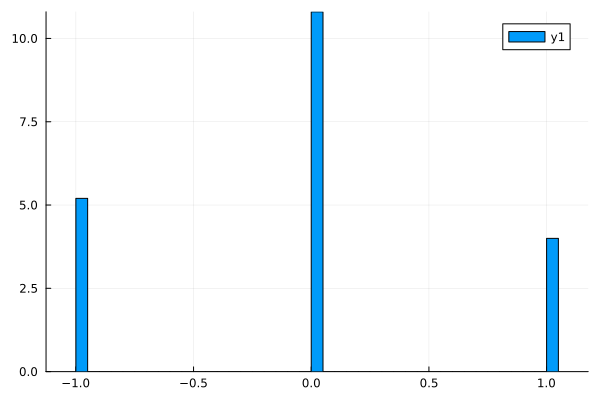

In [64]:
M = diagm(rand((-1/2, 1/2), N)) + diagm(rand((-1/2, 1/2), N)) 

spectrum2 = real(eigvals(M))
histogram(spectrum2, bins=50, normed=true)

"Free" addition: 

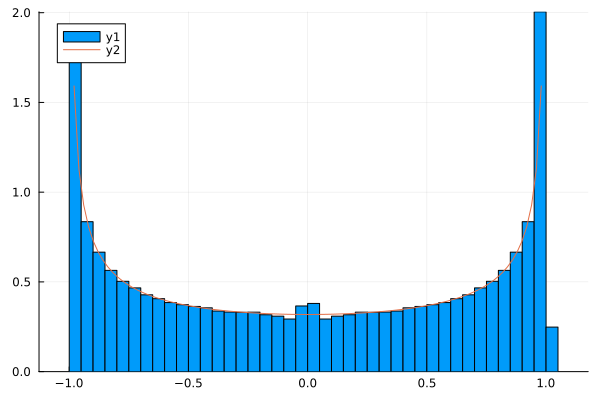

In [67]:
function spectral_distribution(N)
    spectrum = []

    H1 = diagm(rand((-1/2, 1/2), N))
    H2 = diagm(rand((-1/2, 1/2), N))
    
    for i in 1:50 # 50 realizations 
        RM = rand(Wigner(2), N)
        U = eigvecs(RM)
    
        # normalization of eigenvectors 
        for i in axes(U, 2)
            U[:,i] /= sqrt(U[:, i] ⋅ U[:,i])
        end
    
        M = H1 + U * H2 * U'
        
        for eigv in real(eigvals(M))
            push!(spectrum, eigv)
        end
    end 

    return spectrum
   
end

histogram(spectral_distribution(500), bins=50, normed=true)

function arcsine(λ)
    return 1 / pi / sqrt(1 - λ * λ)
end

λ = LinRange(-1, 1, 100)

norm1, error = quadgk(arcsine, -1, 1) 

plot!(λ, 1/norm1 .* arcsine.(λ))

# Exercise 6

Check numerically Pastur equation in the above case of $\lambda_i = \pm a$. First perform the simulation. Note, that the eigenvectors of both ensembles are already maximally decorrelated, due to the Gaussian random character of GUE, so simply add diagonal matrix with randomly distributed values $\pm a$ to the GUE matrix, and perform averaging over such example for $a = 1/2, 1, 2, 10$. (b) Compare these results with analytic solution, i.e. solve analytically the resulting cubic (Cardano) equation, identify the right solution for $G(z)$ from the three possible, and plot the spectral function $\rho(\lambda, a)$ as a 3d plot $\rho, \lambda, a$. At which value of a the support of the spectrum splits from single interval
onto two intervals?

For addition of $H_{GUE} + D$ (deterministic matrix) one can derive Pastur equation: 

$$G_{D + R} = G_{D} \left(z - G_{D+ R}(z) \right), \quad G_D = \sum_{i} \frac{p_i}{z - \lambda_i} $$

In case of $p_1 = p_2$ and eigenvalues $\pm a$ $\left(G_{D+R} \equiv G \right)$:

$$ G(z) = \frac{1}{2} \left(\frac{1}{z - a  - G(z)} + \frac{1}{z + a  - G(z)}\right)$$

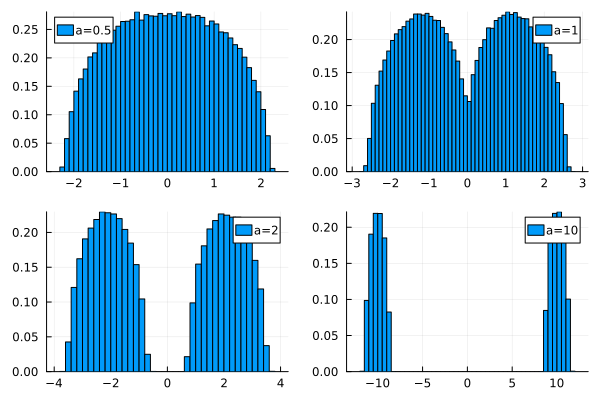

In [70]:
function spectral_density(N, a)
    spectrum = []
    for i in 1:500 # 50 realizations
        H = rand(Wigner(2), N)
        D = diagm(rand((-a, a), N))

        for eigv in eigvals(H + D)
            push!(spectrum, eigv)
        end
    end

    return spectrum
end

histogram([spectral_density(100, 0.5), spectral_density(100, 1), spectral_density(100, 2), spectral_density(100, 10)], 
bins=60, layout=4, label =["a=0.5" "a=1" "a=2" "a=10"], normed=true)

At which value of a the support of the spectrum splits from single interval
onto two intervals?

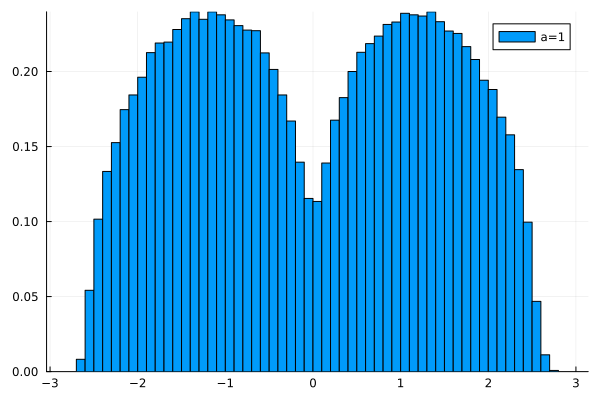

In [71]:
a = 1
histogram(spectral_density(100, a), bins=60, label ="a="*string(a), normed=true)

# Exercise 7

The Reader may easily calculate now the spectral distribution of so-called free F-distribution, i.e. the spectral distribution of the quotient $ X_1 /X_2 $, where $X_1$ , $X_2$ come from two free Wishart distributions,
with rectangularities $r_1$ and $r_2$ , respectively.

# Exercise 8

Take complex matrix $H$. Plot eigenvalues with measure $e^{-N \mathrm{Tr} X X^{\dagger}}$.

$$ C = H_1 + i H_2,$$ 
where $H_1$, $H_2$ - GUE matrices 

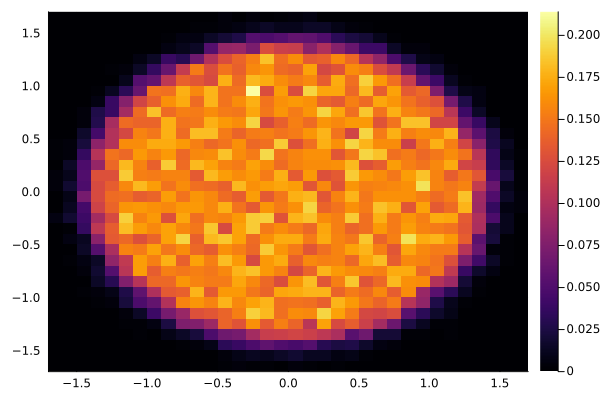

In [54]:
N = 50
C = [rand(Wigner(2),N) + im * rand(Wigner(2),N) for i in 1:1000]

spectra = collect(Iterators.flatten(eigvals.(C)))
spectra_re, spectra_im = [], []

for eigv in spectra
    push!(spectra_re, eigv.re)
    push!(spectra_im, eigv.im)
end

histogram2d(spectra_re, spectra_im, bins=50, normalize=:pdf, show_empty_bins=true) 

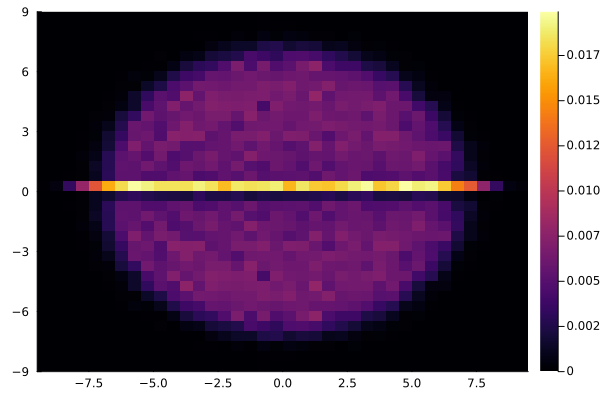

In [75]:
N = 50
X = [rand(Normal(0,1), N, N) for i in 1:1000]

spectra = collect(Iterators.flatten(eigvals.(X)))
spectra_re, spectra_im = [], []

for eigv in spectra
    push!(spectra_re, eigv.re)
    push!(spectra_im, eigv.im)
end

histogram2d(spectra_re, spectra_im, bins=50,  normalize=:pdf, show_empty_bins=true)